In [10]:
##Import Data and Pandas Library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math


In [17]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [18]:
train.info

<bound method DataFrame.info of           id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0          0  2.3859      15.0  3.827160   1.112100      1280.0  2.486989   
1          1  3.7188      17.0  6.013373   1.054217      1504.0  3.813084   
2          2  4.7750      27.0  6.535604   1.103175      1061.0  2.464602   
3          3  2.4138      16.0  3.350203   0.965432      1255.0  2.089286   
4          4  3.7500      52.0  4.284404   1.069246      1793.0  1.604790   
...      ...     ...       ...       ...        ...         ...       ...   
37132  37132  3.3438      50.0  4.936508   1.079365      1775.0  3.022222   
37133  37133  3.7308      26.0  5.087533   0.966019      1006.0  4.316901   
37134  37134  4.1716      52.0  4.678862   1.101485      1156.0  1.431734   
37135  37135  2.7143      16.0  5.710074   1.068376       584.0  2.803659   
37136  37136  2.2419      34.0  5.424419   1.058685      1340.0  3.799065   

       Latitude  Longitude  MedHouseVal  
0

In [19]:
#checking if there is any missing columns
train.loc[:, train.isnull().any()]

""
0
1
2
3
4
...
37132
37133
37134
37135


In [40]:
X = train.drop(['Latitude','Longitude', 'MedHouseVal','id'], axis = 1)
y=train[['MedHouseVal']]
y= y.to_numpy(dtype="int")

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Instantiating the model
train_mod = RandomForestRegressor(random_state = 42, n_jobs=-1)
train_mod.fit(X_train, y_train.ravel())

# Making predictions
y_pred = train_mod.predict(X_test)
print(y_pred)

# Measuring the accuracy of the model
print(f'RMSE Score: {mean_squared_error(y_test, y_pred, squared=False)}')

[1.59 1.58 2.29 ... 2.74 1.34 0.71]
RMSE Score: 0.8169112917063406


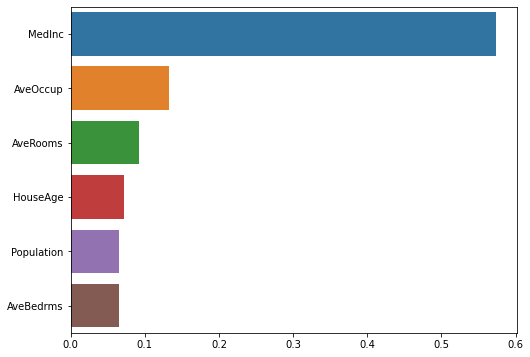

In [36]:
#Feature(Variable) importance
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
ftr_importances_values = train_mod.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()


## Reference
https://yaeyang0629.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%ED%8C%8C%EC%9D%B4%EC%8D%AC-Random-Forest-Regressor%ED%9A%8C%EA%B7%80

Dataset<-https://www.kaggle.com/competitions/playground-series-s3e1